In [ ]:
import lstsq
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')

: 

In [3]:
np.random.seed(0)

Xtrain = np.random.normal(size = (1000, 1))
Ytrain = -0.9 * Xtrain[:,0] + 0.4 * np.random.normal(size=Xtrain.shape[0])

Xtest = np.sort(np.random.normal(size = (400, 1)))
Ytest = -0.9 * Xtest[:,0] + 0.4 * np.random.normal(size=Xtest.shape[0])

tensor([-0.9102], requires_grad=True)

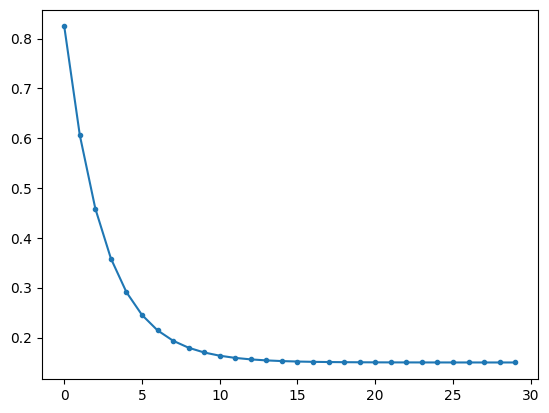

In [4]:
def regr(X,Y,w=None): return lstsq.fit(X, Y, n_iter=30, eta=0.1, batch_size=10, w=w)
w, history = regr(Xtrain, Ytrain)

plt.plot(history, '.-');
w

In [9]:
n_iter = 30
batch_size = 10
eta = 0.1
X = Xtrain
Y = Ytrain

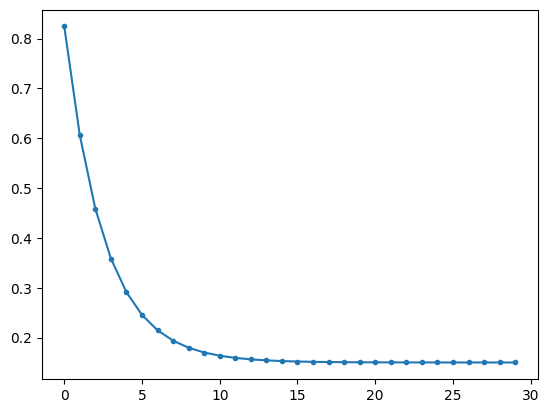

In [20]:
import torch

n_samples, n_features = X.shape

Xt = torch.tensor(X, dtype=torch.float)
Yt = torch.tensor(Y, dtype=torch.float).reshape(-1, 1)

history = []

network = torch.nn.Linear(n_features, 1, bias=False)
network.weight.data.fill_(0)
optimizer = torch.optim.SGD(network.parameters(), lr=eta)

for i in range(n_iter):

    permutation = torch.randperm(n_samples)

    epoch_loss = 0

    for batch_start in range(0, n_samples, batch_size):

      idx = permutation[batch_start:batch_start + batch_size]
      Xbatch = Xt[idx, :]
      Ybatch = Yt[idx, :]
  
      Ypred = network(Xbatch)
      
      loss_batch = torch.sum((Ypred - Ybatch)**2) / n_samples
      
      # .item() converts a 1-element tensor to a Python float
      epoch_loss += loss_batch.item()
      
      # reset gradients from previous batch
      optimizer.zero_grad()

      # compute the gradients for this batch
      loss_batch.backward()

      # update the parameters
      # for SGD, this is equivalent to w -= learning_rate * gradient
      optimizer.step()
                
    history.append(epoch_loss)

plt.plot(history, '.-');
